In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.getLogger().setLevel(logging.CRITICAL)
from warnings import simplefilter
simplefilter(action = 'ignore', category = FutureWarning)
sns.set()
#import the data
data = pd.read_csv('archive/tested.csv')
#explore the data
data.head()
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


(418, 12)

In [5]:
#explore the data
data.head()
data.info()
data.shape
#drop the Cabin column because the nil vacancies is more than 60%

data = data.drop('Cabin', axis = 1)
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


(418, 11)

male      266
female    152
Name: Sex, dtype: int64
Percentage of male and female population are:
male      63.636364
female    36.363636
Name: Sex, dtype: float64


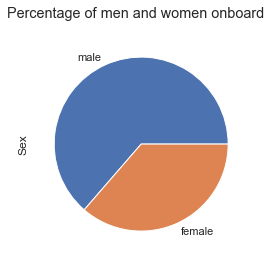

In [14]:
pop_val = data['Sex'].value_counts()
print(pop_val)
percentages= (pop_val/(pop_val.sum())) *100
print("Percentage of male and female population are:")
print(percentages)
percentages.plot.pie(subplots = True,title="Percentage of men and women onboard")
plt.savefig('The percentageof male to female onboard.png')
plt.show()


### The percentage of male on board was 64.76% and that of the female is 35.24%

        Survived
Sex             
female         1
male           0
        Survived
Sex             
female     100.0
male         0.0


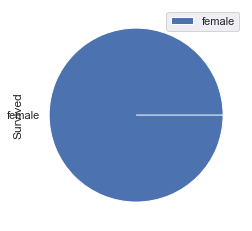

In [25]:
surv_gen = data.pivot_table(index = 'Sex', values = 'Survived')
print(surv_gen)
Percentage_of_survival = (surv_gen/(surv_gen.sum())) *100
print(Percentage_of_survival)
Percentage_of_survival.plot.pie(subplots = True)
plt.savefig('percentage of survival relative to gender.png')

## Southampton was the boarding city of most prople

Embarked
C    102
Q     46
S    270
dtype: int64


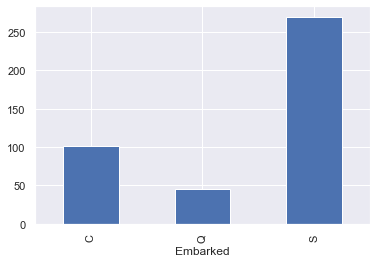

In [38]:
#where people boarded the most

pop_boarding_loc = data.groupby('Embarked').size()
print(pop_boarding_loc)
pop_boarding_loc.plot.bar()
plt.savefig('size of population where people boarded.png')

### Majority boarded at Southampton, by a staggering percentage of 86%,  Southampton people boaded the most.

## Now checking for the class with number of population

3    218
1    107
2     93
Name: Pclass, dtype: int64
3    52.153110
1    25.598086
2    22.248804
Name: Pclass, dtype: float64


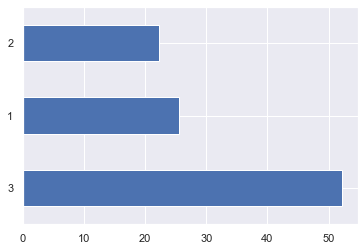

In [27]:
pop_pclass = data['Pclass'].value_counts()
print(pop_pclass)
pop_pclass_percent = (pop_pclass/(pop_pclass.sum())) *100
print(pop_pclass_percent)
pop_pclass_percent.plot.barh()
plt.savefig('class population percentage.png')

### Heigest number of population brelong to class 3

### The third class had 55.106622 % , the second class had 20.650954% while the first class had 24.242424% of the people on board.

## When it came to survival, the third class had the lowest rate

        Survived
Pclass          
1       0.467290
2       0.322581
3       0.330275
         Survived
Pclass           
1       41.716873
2       28.798100
3       29.485027


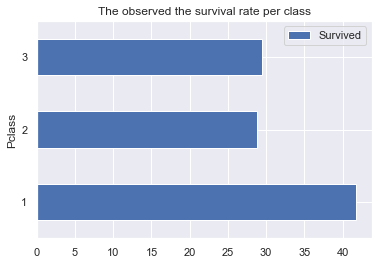

In [32]:
#survival rate according to the cabin class.

surv_pclass = data.pivot_table(index = 'Pclass', values ='Survived')
print(surv_pclass)
surv_pclass_percent = (surv_pclass/(surv_pclass.sum())) *100
print(surv_pclass_percent)
surv_pclass_percent.plot.barh(title="The observed the survival rate per class")
plt.savefig('percentage of survival per class.png')

### The first class had the highest rate of survival while the third class had the lowest